In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class AnalizadorDatos:
    """
    Clase para el análisis de datos de un archivo .npy.
    Permite cargar los datos, dividirlos en entrenamiento y validación,
    calcular estadísticas descriptivas y generar histogramas con métricas.
    """

    def __init__(self, ruta_archivo):
        """
        Inicializa el analizador cargando los datos desde un archivo .npy.

        Parámetros:
        ruta_archivo (str): Ruta del archivo .npy con los datos.
        """
        self.ruta_archivo = ruta_archivo
        self.datos = None
        self.df = None
        self.entrenamiento = None
        self.validacion = None
        self.nombres_columnas = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
        
        self.cargar_datos()
    
    def cargar_datos(self):
        """Carga los datos desde un archivo .npy y los convierte en un DataFrame de Pandas."""
        try:
            self.datos = np.load(self.ruta_archivo, allow_pickle=True)
            self.df = pd.DataFrame(self.datos, columns=self.nombres_columnas)
            print("Datos cargados correctamente.")
        except Exception as e:
            print(f"Error al cargar los datos: {e}")

    def dividir_datos(self, proporcion_entrenamiento=0.8):
        """
        Divide los datos en entrenamiento y validación.

        Parámetros:
        proporcion_entrenamiento (float): Proporción de los datos a utilizar para entrenamiento. 
                                          Por defecto es 0.8 (80%).
        """
        tamano_entrenamiento = int(len(self.df) * proporcion_entrenamiento)
        self.entrenamiento = self.df.iloc[:tamano_entrenamiento, :].copy()
        self.validacion = self.df.iloc[tamano_entrenamiento:, :].copy()
        print(f"Datos divididos en {tamano_entrenamiento} registros para entrenamiento y {len(self.df) - tamano_entrenamiento} para validación.")

    def calcular_estadisticas(self):
        """
        Calcula estadísticas descriptivas sobre los datos de entrenamiento.

        Retorna:
        pd.DataFrame: Un DataFrame con las estadísticas de cada columna, incluyendo:
                      - Media
                      - Máximo
                      - Mínimo
                      - Rango (peak-to-peak)
                      - Desviación estándar
        """
        if self.entrenamiento is None:
            print("Primero ejecuta dividir_datos() antes de calcular estadísticas.")
            return None
        
        estadisticas = {
            "Media": np.mean(self.entrenamiento, axis=0),
            "Maximo": np.max(self.entrenamiento, axis=0),
            "Minimo": np.min(self.entrenamiento, axis=0),
            "Rango": np.ptp(self.entrenamiento, axis=0),  # Peak-to-peak (max - min)
            "DesviacionEstandar": np.std(self.entrenamiento, axis=0)
        }
        
        df_estadisticas = pd.DataFrame(estadisticas, index=self.nombres_columnas)
        return df_estadisticas
    
    def mostrar_cabecera(self, n=5):
        """
        Muestra las primeras 'n' filas del DataFrame.

        Parámetros:
        n (int): Número de filas a mostrar. Por defecto es 5.
        """
        print(self.df.head(n))

    def graficar_histogramas(self):
        """
        Genera histogramas para cada variable en el dataset, incluyendo:
        - Media (línea roja)
        - Mediana (línea azul)
        - Desviación estándar (líneas verdes en ±1σ)
        - Máximo y mínimo (marcadores)
        """
        for columna in self.nombres_columnas:
            datos = self.df[columna].dropna()  # Elimina valores nulos si los hay

            # Calcular estadísticas
            media = np.mean(datos)
            mediana = np.median(datos)
            desviacion = np.std(datos)
            minimo = np.min(datos)
            maximo = np.max(datos)

            # Crear histograma con seaborn
            plt.figure(figsize=(8, 5))
            sns.histplot(datos, kde=True, bins=30, color='lightseagreen')
            #lightseagreen, turquoise

            # Agregar líneas de estadísticas
            plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
            plt.axvline(mediana, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
            plt.axvline(media - desviacion, color='red', linestyle='dotted', linewidth=2, label=f'-1σ: {(media - desviacion):.2f}')
            plt.axvline(media + desviacion, color='orange', linestyle='dotted', linewidth=2, label=f'+1σ: {(media + desviacion):.2f}')

            # Marcar mínimo y máximo
            plt.scatter([minimo, maximo], [0, 0], color='black', zorder=3, label=f'Mín: {minimo:.2f}, Máx: {maximo:.2f}')

            # Configuración del gráfico
            plt.title(f"Histograma de {columna}")
            plt.xlabel(columna)
            plt.ylabel("Frecuencia")
            plt.legend()
            plt.grid(True)
            plt.show()

In [61]:
# ---------- DEFINICION Y USO DE LA CLASE ----------
if __name__ == "__main__":
    # Crear una instancia de la clase
    ruta_archivo = r"C:\PythonWs\Proyecto\proyecto_training_data.npy"
    analizador = AnalizadorDatos(ruta_archivo)

    # Mostrar las primeras filas
    #analizador.mostrar_cabecera()

    # Separar los datos en entrenamiento y validación
    analizador.dividir_datos()

Datos cargados correctamente.
Datos divididos en 1168 registros para entrenamiento y 292 para validación.


In [52]:

# Calcular y mostrar estadísticas descriptivas
estadisticas = analizador.calcular_estadisticas()
print(estadisticas)

                      Media    Maximo   Minimo     Rango  DesviacionEstandar
SalePrice     180590.277397  755000.0  34900.0  720100.0        78781.951080
OverallQual        6.101027      10.0      1.0       9.0            1.377435
1stFlrSF        1156.323630    3228.0    334.0    2894.0          373.620332
TotRmsAbvGrd       6.485445      14.0      2.0      12.0            1.608452
YearBuilt       1971.451199    2010.0   1875.0     135.0           29.938882
LotFrontage       69.946985     313.0     21.0       NaN           23.465955


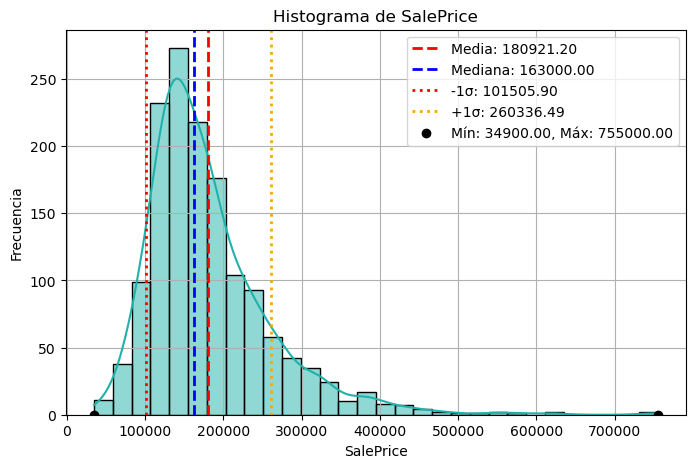

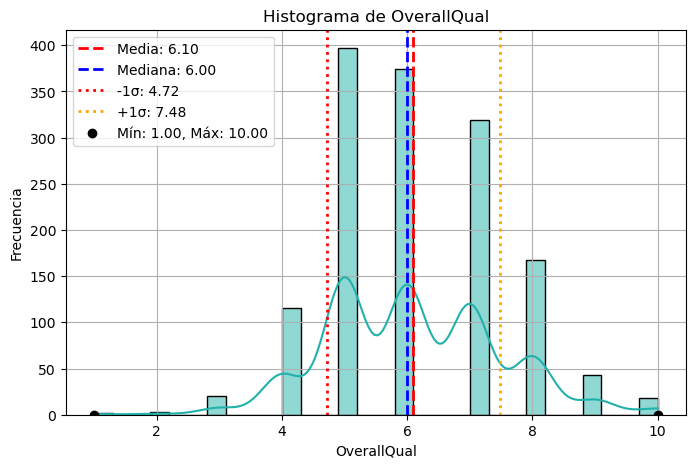

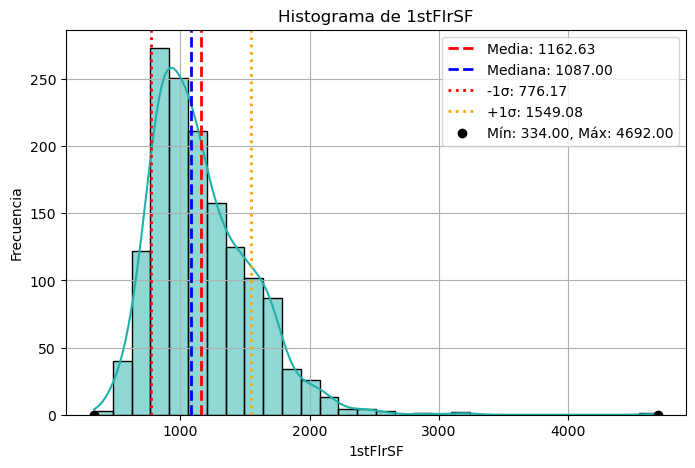

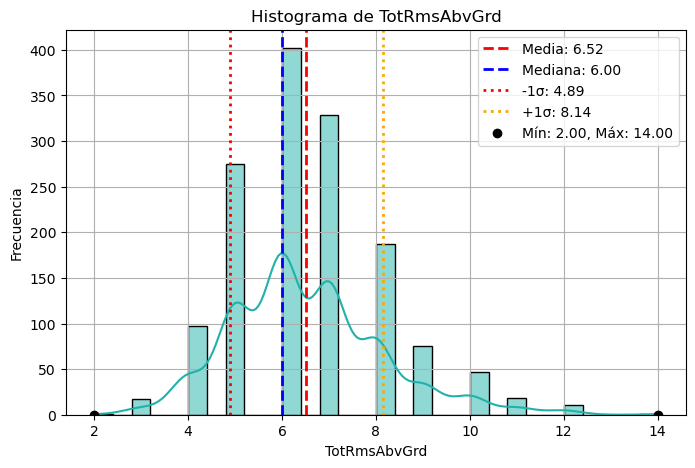

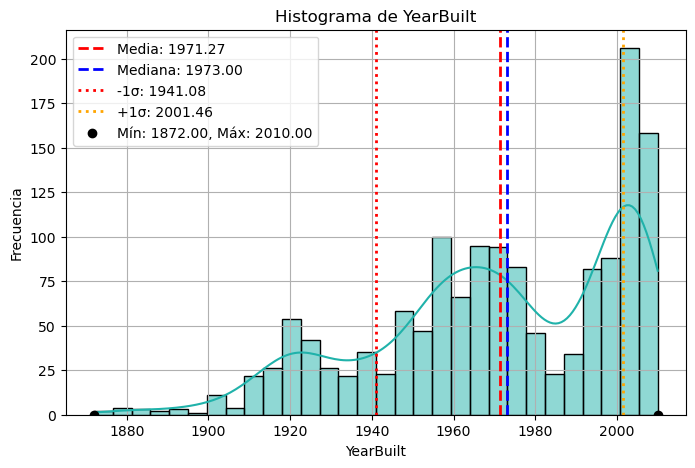

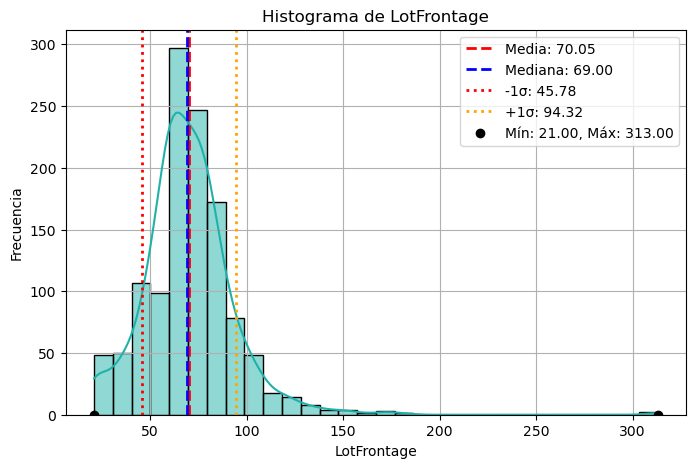

In [62]:
analizador.graficar_histogramas()